<a href="https://colab.research.google.com/github/ssaine95/CoderHouseDataScience/blob/main/Pruebas_Modelos_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2. Importación del Dataset**

In [2]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.1 MB/s eta 0:00:00


In [3]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import numpy as np
import statsmodels.formula.api as sm
import chart_studio.plotly as py
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/Coderhouse'
df3 = pd.read_excel('footballData2.xlsx')
print(df3)

/content/drive/MyDrive/Coderhouse
       sofifa_id         short_name                            long_name  age  \
0         158023           L. Messi      Lionel AndrÃ©s Messi Cuccittini   33   
1          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35   
2         200389           J. Oblak                            Jan Oblak   27   
3         188545     R. Lewandowski                   Robert Lewandowski   31   
4         190871          Neymar Jr       Neymar da Silva Santos JÃºnior   28   
...          ...                ...                                  ...  ...   
18714     256679          K. Angulo                         Kevin Angulo   24   
18715     257710     Zhang Mengxuan                       Mengxuan Zhang   21   
18716     250989      Wang Zhenghao                            çŽ‹æ”¿è±ª   20   
18717     257697        Chen Zitong                          Zitong Chen   23   
18718     257936           Song Yue                             Yue Song   

In [6]:
df3.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,gk_speed,gk_positioning,attacking_finishing,skill_dribbling,movement_acceleration,movement_sprint_speed,power_shot_power,mentality_aggression,defending_standing_tackle,goalkeeping_handling
0,158023,L. Messi,Lionel AndrÃ©s Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,0,0,95,96,91,80,86,44,35,11
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,0,0,95,88,87,91,94,63,32,11
2,200389,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,AtlÃ©tico Madrid,Spain Primera Division,...,52,90,11,12,43,60,59,34,12,92
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern MÃ¼nchen,German 1. Bundesliga,...,0,0,94,85,77,78,89,81,42,6
4,190871,Neymar Jr,Neymar da Silva Santos JÃºnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,0,0,87,95,94,89,80,51,30,9


In [7]:
df3.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'player_positions2', 'position_segment', 'position_desc',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_finishing',
       'skill_dribbling', 'movement_acceleration', 'movement_sprint_speed',
       'power_shot_power', 'mentality_aggression', 'defending_standing_tackle',
       'goalkeeping_handling'],
      dtype='object')

In [8]:
print(df3.dtypes)

sofifa_id                             int64
short_name                           object
long_name                            object
age                                   int64
dob                          datetime64[ns]
height_cm                             int64
weight_kg                             int64
nationality                          object
club_name                            object
league_name                          object
league_rank                           int64
overall                               int64
potential                             int64
value_eur                             int64
wage_eur                              int64
player_positions                     object
player_positions2                    object
position_segment                     object
position_desc                        object
preferred_foot                       object
international_reputation              int64
weak_foot                             int64
skill_moves                     

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sofifa_id                  18719 non-null  int64         
 1   short_name                 18719 non-null  object        
 2   long_name                  18719 non-null  object        
 3   age                        18719 non-null  int64         
 4   dob                        18719 non-null  datetime64[ns]
 5   height_cm                  18719 non-null  int64         
 6   weight_kg                  18719 non-null  int64         
 7   nationality                18719 non-null  object        
 8   club_name                  18719 non-null  object        
 9   league_name                18719 non-null  object        
 10  league_rank                18719 non-null  int64         
 11  overall                    18719 non-null  int64         
 12  pote

## FEATURE ENGINEERING

In [17]:
#Para realizar el feature engineering incorporamos 3 columnas más (potential, preferred_foot, position_segment)
#que las utilizadas en las pruebas anteriores

df3_feature = df3[['age',
 'height_cm',
 'overall',
 'potential',
 'wage_eur',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'power_shot_power',
 'mentality_aggression', 'value_eur', 'preferred_foot', 'position_segment']]


In [18]:
df3_feature = df3_feature.copy()

In [19]:
# Crear una nueva característica que indique el sueldo anual
df3_feature['annual_wage_eur'] = df3_feature['wage_eur'] * 12
# Codificar la característica 'estado_civil' utilizando one-hot encoding
df3_feature = pd.get_dummies(df3_feature, columns=['position_segment'])
df3_feature = pd.get_dummies(df3_feature, columns=['preferred_foot'])

In [20]:
df3_feature.columns

Index(['age', 'height_cm', 'overall', 'potential', 'wage_eur', 'skill_moves',
       'pace', 'shooting', 'passing', 'dribbling', 'power_shot_power',
       'mentality_aggression', 'value_eur', 'annual_wage_eur',
       'position_segment_Defender', 'position_segment_Forward',
       'position_segment_Goalkeeper', 'position_segment_Midfielder',
       'preferred_foot_Left', 'preferred_foot_Right'],
      dtype='object')

## Prueba **outliers** con Isolation Forest

In [ ]:
df3_feature_2 = df3[['age',
 'height_cm',
 'overall',
 'potential',
 'value_eur',
 'dribbling',
 'defending',
 'physic',
 'movement_acceleration',
 'mentality_aggression','wage_eur']]

In [ ]:
df3_feature_3 = df3 [['age','height_cm','weight_kg','overall', 'potential', 'value_eur', 'wage_eur','skill_moves','pace', 'shooting', 'passing', 'dribbling','defending', 'physic','attacking_finishing','skill_dribbling', 'movement_acceleration','movement_sprint_speed','power_shot_power', 'mentality_aggression']]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


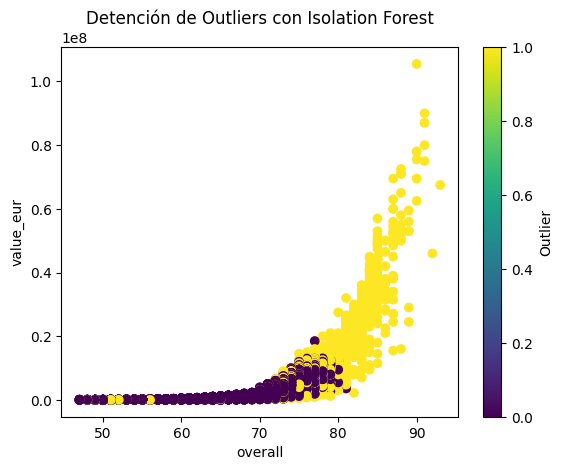

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # contamination representa la proporción esperada de valores atípicos
model.fit(df3_feature)

# Predecir outliers
outliers = model.predict(df3_feature)
outliers_mask = outliers == -1  # Filtrar los valores que son considerados outliers

# Visualizar los outliers
plt.scatter(df3_feature['overall'], df3_feature['value_eur'], c=outliers_mask, cmap='viridis')
plt.xlabel('overall')
plt.ylabel('value_eur')
plt.title('Detención de Outliers con Isolation Forest')
plt.colorbar(label='Outlier')
plt.show()


In [23]:
print(outliers)

[-1 -1 -1 ...  1  1  1]


In [24]:
print(outliers_mask)

[ True  True  True ... False False False]


In [25]:
df_clean = df3_feature[~outliers_mask]

In [66]:
print(df_clean)

       age  height_cm  overall  potential  wage_eur  skill_moves  pace  \
317     37        188       81         81     13000            2    66   
436     35        186       80         80     18000            3    65   
463     29        180       80         80     42000            3    68   
472     34        178       80         80     21000            3    68   
473     30        187       80         80       500            3    68   
...    ...        ...      ...        ...       ...          ...   ...   
18713   21        174       47         53      1000            2    58   
18714   24        176       47         52       500            2    63   
18716   20        185       47         51      1000            2    51   
18717   23        186       47         51      1000            2    61   
18718   28        185       47         47      2000            2    65   

       shooting  passing  dribbling  power_shot_power  mentality_aggression  \
317          51       60        

In [29]:
model5 = 'value_eur~potential+overall'
lm1   = sm.ols(formula = model5, data = df_clean).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:07:41   Log-Likelihood:            -2.6062e+05
No. Observations:               16847   AIC:                         5.212e+05
Df Residuals:                   16844   BIC:                         5.213e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.692e+07   1.34e+05   -126.047      0.0

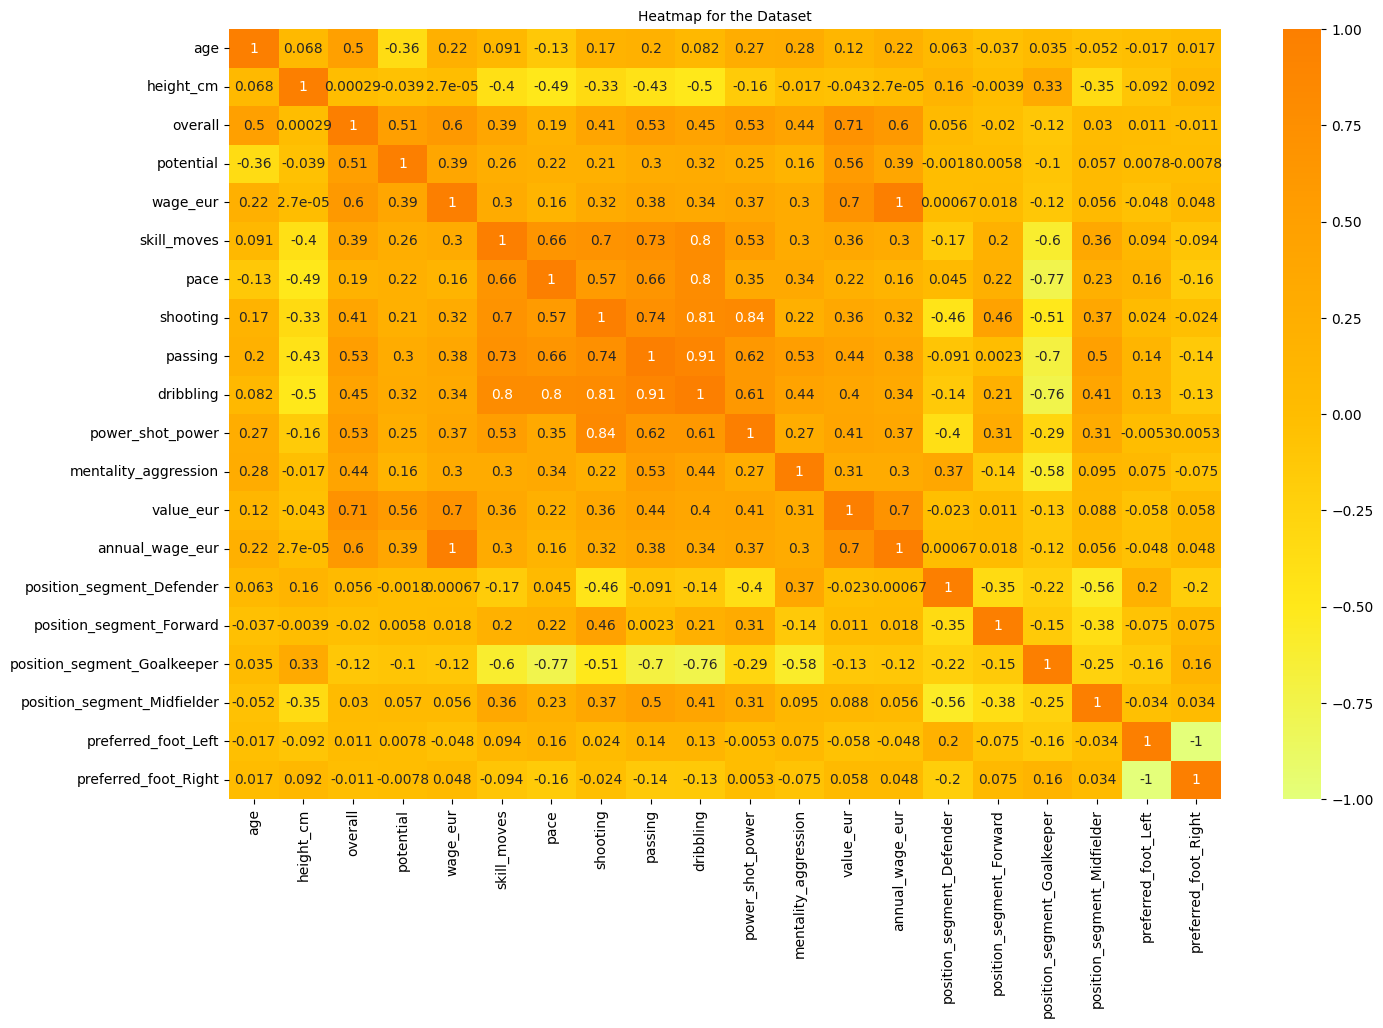

In [30]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (16, 10)

sns.heatmap(df_clean.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 10)
plt.show()

## Prueba **outliers** con DBSCAN

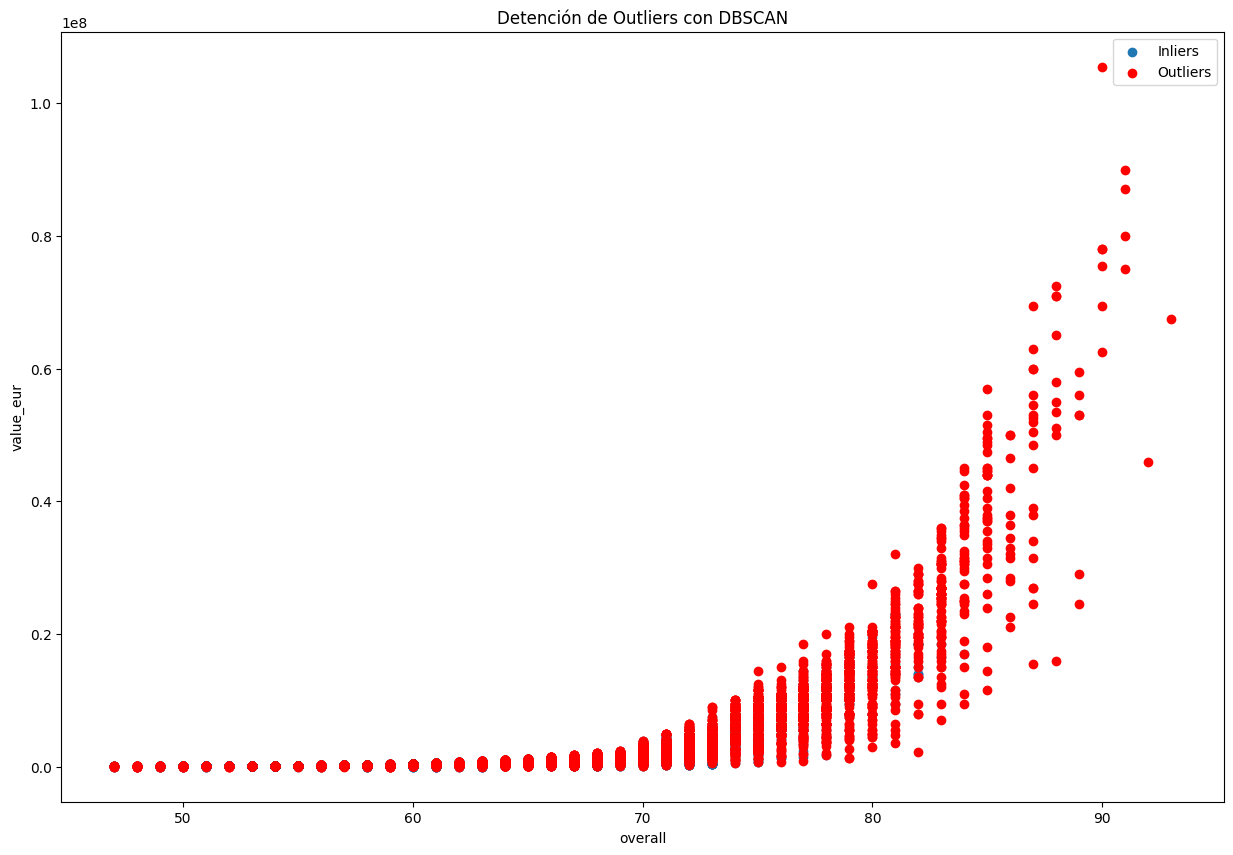

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3_feature)

# Entrenar el modelo DBSCAN
model = DBSCAN(eps=0.9, min_samples=2)  # eps es la distancia máxima entre dos muestras para ser consideradas vecinas
model.fit(df_scaled)

# Filtrar los outliers
outliers_mask = model.labels_ == -1

# Eliminar los outliers del DataFrame
df_clean_2 = df3_feature[~outliers_mask]

# Visualizar los resultados
plt.scatter(df_clean_2['overall'], df_clean_2['value_eur'], label='Inliers')
plt.scatter(df3_feature[outliers_mask]['overall'], df3_feature[outliers_mask]['value_eur'], color='red', label='Outliers')
plt.xlabel('overall')
plt.ylabel('value_eur')
plt.title('Detención de Outliers con DBSCAN')
plt.legend()
plt.show()

In [54]:
print(df_clean_2)

       age  height_cm  overall  potential  wage_eur  skill_moves  pace  \
123     33        192       84         84     54000            1    25   
188     29        189       83         83     35000            1    25   
209     31        190       83         83     47000            1    25   
225     28        189       82         85     35000            1    25   
228     27        188       82         84     20000            1    25   
...    ...        ...      ...        ...       ...          ...   ...   
18711   23        170       47         55      1000            2    63   
18712   20        181       47         53      1000            2    59   
18713   21        174       47         53      1000            2    58   
18714   24        176       47         52       500            2    63   
18715   21        177       47         52      1000            2    58   

       shooting  passing  dribbling  power_shot_power  mentality_aggression  \
123          25       25        

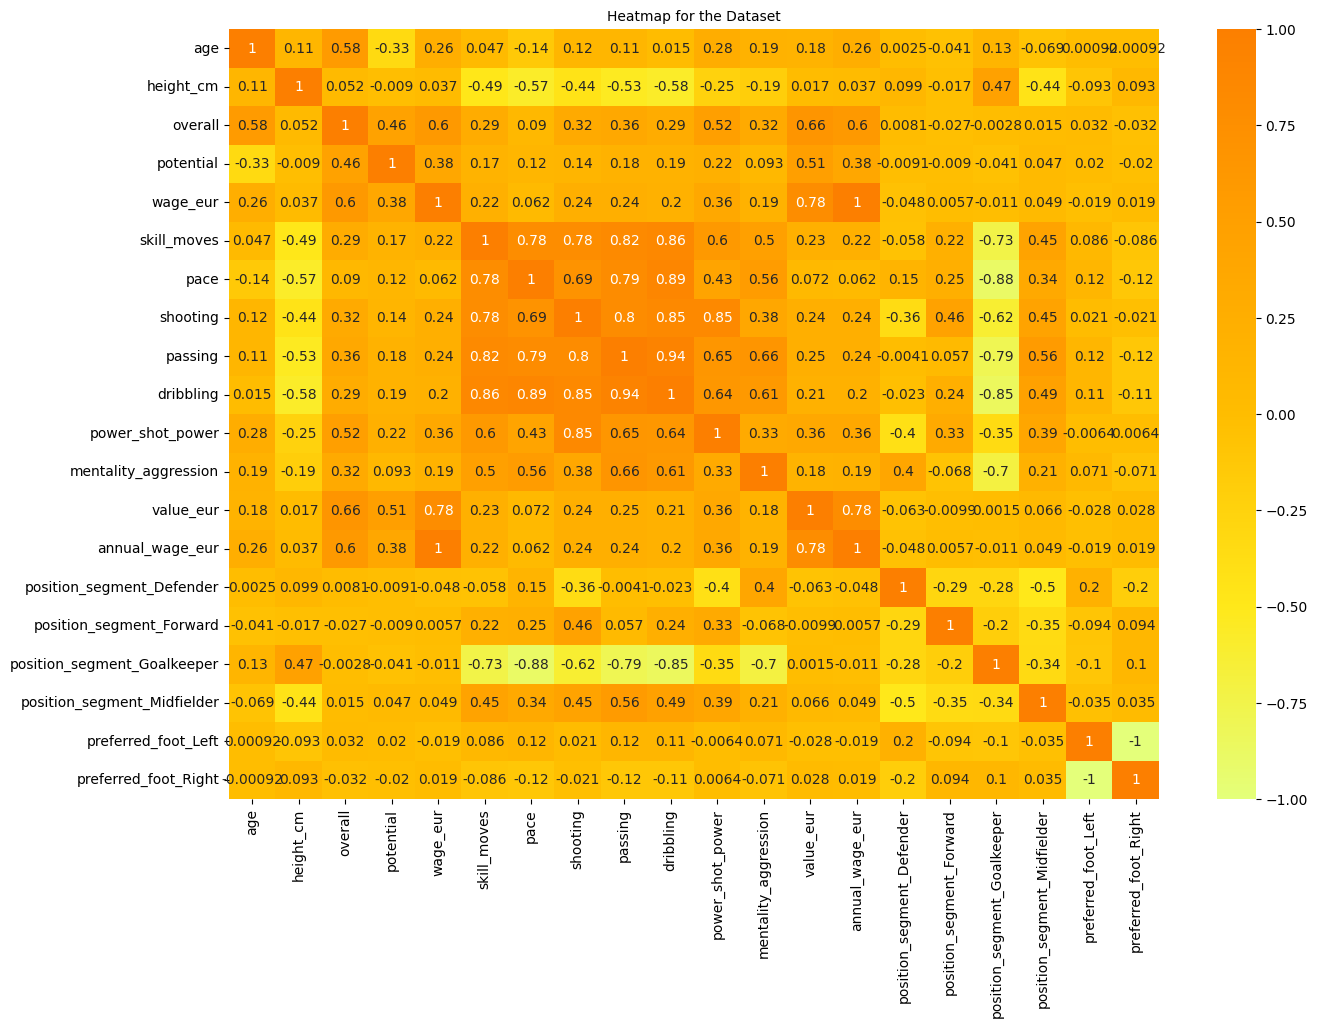

In [55]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(df_clean_2.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 10)
plt.show()

In [57]:
model6 = 'value_eur~potential+overall'
lm1   = sm.ols(formula = model6, data = df_clean_2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     5466.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:20:04   Log-Likelihood:            -1.7855e+05
No. Observations:               11574   AIC:                         3.571e+05
Df Residuals:                   11571   BIC:                         3.571e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.489e+07   1.67e+05    -89.321      0.0

## **KFOLD Cross Validation Regresion Parte 2**

In [67]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#cross validation libs
from sklearn.model_selection import KFold, cross_val_score

In [68]:
X2 = df_clean.drop('value_eur', axis=1)

In [69]:
y2 = df_clean['value_eur']

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

# Instanciar el metodo con los kfold desados
kfold = KFold(3)

# Instanciar el modelo a entrenar
model = RandomForestRegressor()


# dividimos el conjunto de datos
# obtenemos los indices de cada splits
splits = kfold.split(X2)





In [71]:
# Realizamos el for para iterar sobre los splits
# Recuerda que cada split tiene los indices de entrenamiento y test
scores = []

# utilizamos el metodo enumerate que retorna el indice
# del split y una tupla con (train, test) indices
for i, (train_index,test_index) in enumerate(splits) :

  if i == 0:
    print (f"Indices Train {train_index[0:5]} tamaño {len(train_index)}")
    print (f"Indices Test  {test_index [0:5]} tamaño {len(test_index)}")

  #Entrenamos con los indices de train
  model.fit(X2.iloc[train_index], y2.iloc[train_index]) #Completar

  #Estimamos con el indice de prueba
  y_pred2 = model.predict(X2.iloc[test_index]) #Completar

  #Obtenemos score con el indice de prueba
  score = metrics.mean_absolute_error(y2.iloc[test_index], y_pred2) # Completar para obetener la metrica de este conjunto
  #Siguiendo la convencion de sklearn algunos metricas pueden ser negativas
  #obtenemos el valor absoluto
  abs (score)

  #agregamos resultado al scores general
  scores.append(score)

Indices Train [5616 5617 5618 5619 5620] tamaño 11231
Indices Test  [0 1 2 3 4] tamaño 5616


In [73]:
print ("Ejemplo Score ", scores[0:5])
print (f"Media de los resultados {np.mean(scores)}")

Ejemplo Score  [2014761.3693019943, 175396.99964387465, 206345.20926090828]
Media de los resultados 798834.5260689259


## Pruebas regresión con valores Overall y valor de mercado

### Adaboost

In [76]:
pip install -q missingno

In [77]:
pip install xgboost

In [78]:
pip install lightgbm

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

import xgboost as xgb

import lightgbm as lgb

In [ ]:
print(df_clean_2.columns)

Index(['age', 'height_cm', 'overall', 'potential', 'value_eur', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'mentality_aggression',
       'wage_eur', 'annual_wage_eur', 'position_segment_Defender',
       'position_segment_Forward', 'position_segment_Goalkeeper',
       'position_segment_Midfielder', 'preferred_foot_Left',
       'preferred_foot_Right'],
      dtype='object')


In [ ]:
X_ev4 = df_clean_2[['age', 'height_cm', 'overall', 'potential', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'mentality_aggression',
       'wage_eur', 'annual_wage_eur', 'position_segment_Defender',
       'position_segment_Forward', 'position_segment_Goalkeeper',
       'position_segment_Midfielder', 'preferred_foot_Left',
       'preferred_foot_Right']]

In [ ]:
print(X_ev4.columns)

Index(['age', 'height_cm', 'overall', 'potential', 'dribbling', 'defending',
       'physic', 'movement_acceleration', 'mentality_aggression', 'wage_eur',
       'annual_wage_eur', 'position_segment_Defender',
       'position_segment_Forward', 'position_segment_Goalkeeper',
       'position_segment_Midfielder', 'preferred_foot_Left',
       'preferred_foot_Right'],
      dtype='object')


In [ ]:
X_ev4.head()

,age,height_cm,overall,potential,dribbling,defending,physic,movement_acceleration,mentality_aggression,wage_eur,annual_wage_eur,position_segment_Defender,position_segment_Forward,position_segment_Goalkeeper,position_segment_Midfielder,preferred_foot_Left,preferred_foot_Right
440,31,181,80,80,77,77,76,74,74,38000,456000,1,0,0,0,0,1
467,29,182,80,80,72,79,77,73,80,37000,444000,1,0,0,0,0,1
475,29,184,80,80,73,80,74,73,77,29000,348000,1,0,0,0,0,1
479,28,182,80,80,75,74,81,78,78,41000,492000,1,0,0,0,0,1
573,26,177,79,80,75,71,72,79,72,20000,240000,1,0,0,0,1,0


In [ ]:
y3 = df_clean_2['value_eur']

In [80]:
#Separación en Train y VALIDACION
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20)

In [81]:
ada = AdaBoostRegressor(n_estimators=12,learning_rate=0.1, loss='linear',random_state=42)

In [82]:
#Fiteamos el modelo
model = ada.fit(X_train, y_train)

In [83]:
#Predicción!
y_pred = model.predict(X_test) # Sacar predicciones con test

In [84]:
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('coeficiente de determinacion, r2: ', r2) #que tan bien explica modelo, entre mas cerca a 1 mejor

mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse) #esta en unidades cuadradas, entre mas cerca a 0 es mejor

mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MedianAE: ',mae) #en terminos de mediana, cuanto se alejan predicciones de valor real

coeficiente de determinacion, r2:  0.9283745712105109
MSE:  272392212538.73016
MedianAE:  194648.95173086296


In [88]:
df_clean.median()

age                                24.0
height_cm                         181.0
overall                            65.0
potential                          70.0
wage_eur                         2000.0
skill_moves                         2.0
pace                               67.0
shooting                           51.0
passing                            56.0
dribbling                          62.0
power_shot_power                   58.0
mentality_aggression               58.0
value_eur                      575000.0
annual_wage_eur                 24000.0
position_segment_Defender           0.0
position_segment_Forward            0.0
position_segment_Goalkeeper         0.0
position_segment_Midfielder         0.0
preferred_foot_Left                 0.0
preferred_foot_Right                1.0
dtype: float64

# Modelo 2: GradientBoosting

In [90]:
#Ahora comparemos con GBM
gbrt=GradientBoostingRegressor(random_state=42)

In [91]:
#Fiteamos el modelo
model1 = gbrt.fit(X_train, y_train)

In [92]:
y_pred = model1.predict(X_test)

In [93]:
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)

mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)

mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MedianAE: ',mae)

r2:  0.9956177632734101
MSE:  16665689518.349775
MedianAE:  30186.25550960668


# Modelo 3: LightGBM

In [94]:
clf = lgb.LGBMRegressor(learning_rate=0.01,n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 13477, number of used features: 19
[LightGBM] [Info] Start training from score 1274887.437857


In [95]:
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MedianAE: ',mae)

r2:  0.8554800799388129
MSE:  549610682221.3413
MedianAE:  335580.703380283


# Modelo 4: XGBoost

In [96]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=3
)

In [97]:
#Fiteamos
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
#Predecimos
y_pred = regressor.predict(X_test)

In [99]:
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MedianAE: ',mae)

r2:  0.996263728238145
MSE:  14209078382.606472
MedianAE:  29218.90625


# Ahora miremos que tan bien lo hace con el dataset que nos dieron

In [106]:
y2 = y2.values.reshape(-1, 1)

In [ ]:
df_clean['Id'] = X2.index
df_clean['Prediccion_Adaboost'] = model.predict(X2)
df_clean['Prediccion_GradientBoosting'] = gbrt.predict(X2)
df_clean['Prediccion_LightGBM'] = clf.predict(X2)
df_clean['Prediccion_XGBoost'] = regressor.predict(X2)

In [ ]:
df_clean.head()

In [113]:
df_comp = df_clean [['Id','value_eur', 'Prediccion_Adaboost', 'Prediccion_GradientBoosting', 'Prediccion_LightGBM', 'Prediccion_XGBoost']]

In [114]:
df_comp = df_comp.astype(int)

In [115]:
df_comp.head(20)

,Id,value_eur,Prediccion_Adaboost,Prediccion_GradientBoosting,Prediccion_LightGBM,Prediccion_XGBoost
317,317,3600000,8737037,4161603,4033220,4686281
436,436,4500000,8737037,4502268,4068546,4733643
463,463,12500000,9124625,11336843,7525254,11812216
472,472,5500000,8737037,5624347,4196130,5660411
473,473,12000000,9124625,10991595,7378435,10940967
475,475,12500000,9124625,10481195,7333356,10753912
491,491,9500000,8737037,9002993,5101418,8923646
544,544,14500000,9124625,13751876,8072185,13889818
565,565,12500000,9124625,11885406,7425030,11899900
570,570,13000000,9124625,12456629,7590483,13113474
